## Data dictionary
* dteday: The date of the record. 
* season: The season (1: spring, 2: summer, 3: fall, 4: winter). 
* yr: The year (0: 2011, 1: 2012). 
* mnth: The month (1 to 12). 
* holiday: Whether the day is a holiday (1) or not (0). 
* weekday: The day of the week (0-6). 
* workingday: Whether the day is a workday (1) or a weekend/holiday (0). 
* weathersit: The weather situation (1: Clear, 2: Mist/Cloudy, 3: Light Snow/Rain, 4: Heavy 
Rain/Snow). 
* temp: Normalized temperature in Celsius. 
* hum: Normalized humidity. 
* windspeed: Normalized wind speed. 
* casual & registered: Counts of casual and registered users. 
* cnt (Target Variable): The total count of rental bikes (casual + registered).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
day = pd.read_csv("day - day.csv",
                 low_memory=False,
                 parse_dates=["dteday"])

In [3]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [4]:
day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

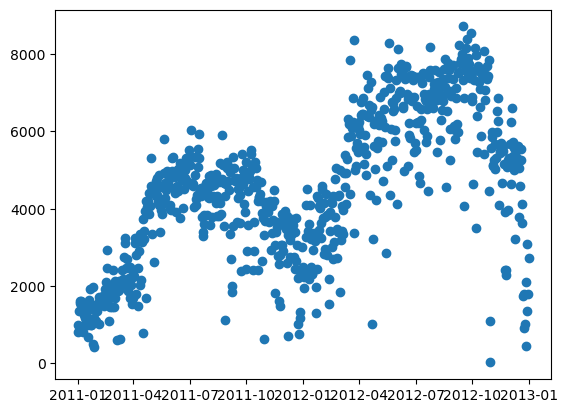

In [6]:
fig, ax = plt.subplots()
ax.scatter(day["dteday"][:1000], day["cnt"][:1000])
plt.show()

In [7]:
day['dteday']

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

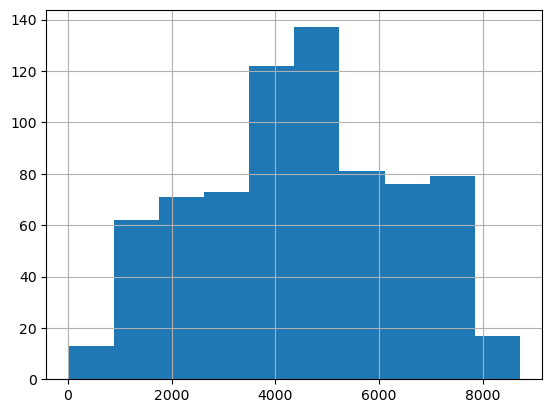

In [8]:
day['cnt'].hist()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


## Model evaluation

## CNT ONLY

In [10]:
X = day.drop(['casual','instant','registered','cnt','dteday'],axis=1)
y= day['cnt']

In [11]:
#train the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42)
}

In [13]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

results_df = pd.DataFrame(results).T
print(results_df)

                          MAE        RMSE        R²
Linear Regression  617.393066  831.285155  0.827667
Decision Tree      662.802721  983.981334  0.758542
Random Forest      429.958299  677.087105  0.885671
Gradient Boosting  462.770118  662.321482  0.890603
XGBoost            422.572784  621.475060  0.903680
CatBoost           399.280989  625.949489  0.902288


As XGBoost has the lowest RMSE score and highest R2 score...we will use that

In [14]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_grid = {
    "learning_rate": np.linspace(0.01, 0.3, 10),    
    "max_depth": np.arange(3, 11),                 
    "n_estimators": np.arange(50, 301, 50),        
    "subsample": np.linspace(0.5, 1.0, 6),         
    "colsample_bytree": np.linspace(0.5, 1.0, 6),  
    "gamma": np.arange(0, 10, 1)                   
}
rs_model= RandomizedSearchCV(XGBRegressor(random_state=42),
                             param_distributions = rf_grid,
                             n_iter=100,
                             cv=5,
                             verbose=True,
                            random_state=42)
rs_model.fit(X_train,y_train)
    

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 5min 53s
Wall time: 1min 40s


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': array([0.5, 0....8, 0.9, 1. ]), 'gamma': array([0, 1, ..., 6, 7, 8, 9]), 'learning_rate': array([0.01 ..., 0.3 ]), 'max_depth': array([ 3, 4..., 8, 9, 10]), ...}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [15]:
rs_model.best_params_

{'subsample': np.float64(0.6),
 'n_estimators': np.int64(100),
 'max_depth': np.int64(4),
 'learning_rate': np.float64(0.1388888888888889),
 'gamma': np.int64(3),
 'colsample_bytree': np.float64(0.7)}

Fitting XGBRegressor to the best paramateres

In [16]:
ideal_model2 = XGBRegressor(subsample=0.6,
                           n_estimators=100,
                           max_depth=4,
                           learning_rate=0.138,
                           gamma=3,
                           colsample_bytree=0.7,
                          random_state=42)
ideal_model2.fit(X_train,y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [28]:
def show_scores(model):
    train_preds = model.predict(X_train)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Training RMSE":  np.sqrt(mean_squared_error(y_train, train_preds)),
              "Training R^2": r2_score(y_train, train_preds)}
    return scores

In [30]:
show_scores(ideal_model2)

{'Training MAE': 198.03955078125,
 'Training RMSE': np.float64(265.1614484611215),
 'Training R^2': 0.9808193445205688}

In [17]:
ideal_model2.feature_importances_

array([0.08394041, 0.42800313, 0.04088256, 0.02643608, 0.01911171,
       0.02137079, 0.05784635, 0.1202895 , 0.14280485, 0.03960095,
       0.0197136 ], dtype=float32)

In [18]:
X_train.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [19]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

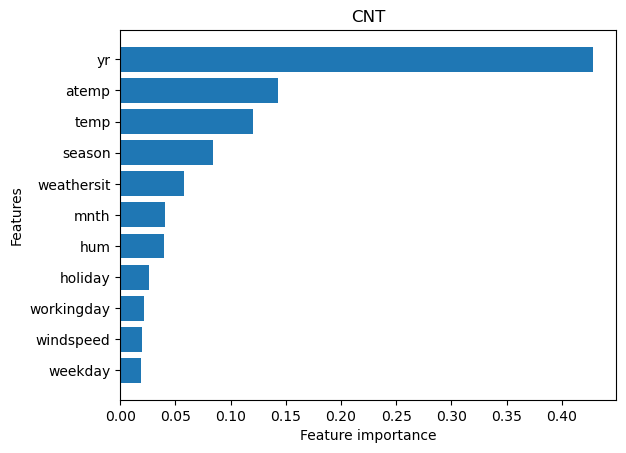

In [77]:
plot_features(X_train.columns,ideal_model2.feature_importances_)
plt.title("CNT")
plt.show()

The feature importance analysis reveals that year **(42.8%)** is the most influential predictor of bike rental demand, reflecting the overall growth trend. Weather-related factors such as temperature **(14.3%)**, feels-like temperature **(12.0%)**, and season **(8.4%)** are also strong drivers, indicating that favorable weather conditions boost demand. Other features like weather situation (5.8%), month (4.1%), humidity (3.9%), and weekday (2.6%) provide moderate contributions, while holiday, working day, and windspeed contribute the least.

## Causal and Registered seperately

In [21]:
X = day.drop(['casual','instant','registered','cnt','dteday'],axis=1)
yc= day['casual']
yr=day['registered']
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X, yc, test_size=0.2, random_state=42)
X_trainr, X_testr, y_trainr, y_testr = train_test_split(X, yr, test_size=0.2, random_state=42)

## Casual

In [22]:
results = {}

for name, model in models.items():
    model.fit(X_trainc, y_trainc)
    y_predc = model.predict(X_testc)
    mae = mean_absolute_error(y_testc, y_predc)
    rmse = np.sqrt(mean_squared_error(y_testc, y_predc))
    r2 = r2_score(y_testc, y_predc)
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

results_casual = pd.DataFrame(results).T
print(results_casual)

                          MAE        RMSE        R²
Linear Regression  267.104128  341.608643  0.700474
Decision Tree      242.190476  381.569637  0.626299
Random Forest      172.536259  269.576233  0.813474
Gradient Boosting  165.584348  263.054709  0.822389
XGBoost            172.390335  259.183303  0.827579
CatBoost           151.506522  252.329177  0.836577


In [23]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rc_grid = {
    "learning_rate": np.linspace(0.01, 0.3, 10),    
    "max_depth": np.arange(3, 11),                 
    "n_estimators": np.arange(50, 301, 50),        
    "subsample": np.linspace(0.5, 1.0, 6),         
    "colsample_bytree": np.linspace(0.5, 1.0, 6),  
    "gamma": np.arange(0, 10, 1)                   
}
rc_model= RandomizedSearchCV(XGBRegressor(random_state=42),
                             param_distributions = rc_grid,
                             n_iter=100,
                             cv=5,
                             verbose=True,
                            random_state=42)
rc_model.fit(X_trainc,y_trainc)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 5min 41s
Wall time: 1min 33s


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': array([0.5, 0....8, 0.9, 1. ]), 'gamma': array([0, 1, ..., 6, 7, 8, 9]), 'learning_rate': array([0.01 ..., 0.3 ]), 'max_depth': array([ 3, 4..., 8, 9, 10]), ...}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [25]:
rc_model.best_params_

{'subsample': np.float64(1.0),
 'n_estimators': np.int64(150),
 'max_depth': np.int64(5),
 'learning_rate': np.float64(0.07444444444444444),
 'gamma': np.int64(4),
 'colsample_bytree': np.float64(0.5)}

In [26]:
ideal_modelc = XGBRegressor(subsample=1.0,
                           n_estimators=150,
                           max_depth=5,
                           learning_rate=0.0744,
                           gamma=4,
                           colsample_bytree=0.5,
                          random_state=42)
ideal_modelc.fit(X_trainc,y_trainc)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.5
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [31]:
def show_scores2(model):
    train_preds = model.predict(X_trainc)
    scores = {"Training MAE": mean_absolute_error(y_trainc, train_preds),
              "Training RMSE":  np.sqrt(mean_squared_error(y_trainc, train_preds)),
              "Training R^2": r2_score(y_trainc, train_preds)}
    return scores

In [32]:
show_scores2(ideal_modelc)

{'Training MAE': 52.285823822021484,
 'Training RMSE': np.float64(71.9749814117291),
 'Training R^2': 0.989412784576416}

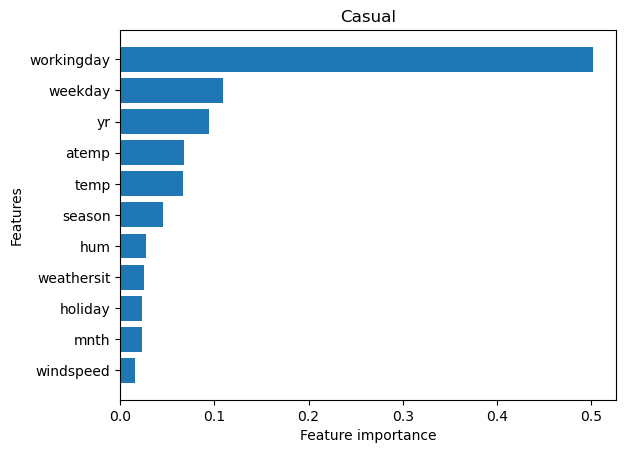

In [78]:
plot_features(X_trainc.columns,ideal_modelc.feature_importances_)
plt.title("Casual")
plt.show()

## Registered

In [34]:
results = {}

for name, model in models.items():
    model.fit(X_trainr, y_trainr)
    y_predr = model.predict(X_testr)
    mae = mean_absolute_error(y_testr, y_predr)
    rmse = np.sqrt(mean_squared_error(y_testr, y_predr))
    r2 = r2_score(y_testr, y_predr)
    results[name] = {"MAE": mae, "RMSE": rmse, "R²": r2}

results_registered = pd.DataFrame(results).T
print(results_registered)

                          MAE        RMSE        R²
Linear Regression  499.271959  697.086654  0.822729
Decision Tree      426.292517  603.842993  0.866982
Random Forest      333.599524  564.376216  0.883801
Gradient Boosting  343.075952  527.978813  0.898306
XGBoost            350.615204  548.652981  0.890186
CatBoost           321.454755  510.234500  0.905026


In [35]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rr_grid = {
    "learning_rate": np.linspace(0.01, 0.3, 10),    
    "max_depth": np.arange(3, 11),                 
    "n_estimators": np.arange(50, 301, 50),        
    "subsample": np.linspace(0.5, 1.0, 6),         
    "colsample_bytree": np.linspace(0.5, 1.0, 6),  
    "gamma": np.arange(0, 10, 1)                   
}
rr_model= RandomizedSearchCV(XGBRegressor(random_state=42),
                             param_distributions = rr_grid,
                             n_iter=100,
                             cv=5,
                             verbose=True,
                            random_state=42)
rr_model.fit(X_trainr,y_trainr)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: total: 5min 40s
Wall time: 2min 29s


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': array([0.5, 0....8, 0.9, 1. ]), 'gamma': array([0, 1, ..., 6, 7, 8, 9]), 'learning_rate': array([0.01 ..., 0.3 ]), 'max_depth': array([ 3, 4..., 8, 9, 10]), ...}"
,n_iter,100
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [36]:
rr_model.best_params_

{'subsample': np.float64(0.6),
 'n_estimators': np.int64(100),
 'max_depth': np.int64(3),
 'learning_rate': np.float64(0.10666666666666666),
 'gamma': np.int64(9),
 'colsample_bytree': np.float64(0.6)}

In [37]:
ideal_modelr = XGBRegressor(subsample=0.6,
                           n_estimators=100,
                           max_depth=3,
                           learning_rate=0.1066,
                           gamma=9,
                           colsample_bytree=0.6,
                          random_state=42)
ideal_modelr.fit(X_trainr,y_trainr)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.6
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [38]:
def show_scores3(model):
    train_predr = model.predict(X_trainr)
    scores = {"Training MAE": mean_absolute_error(y_trainr, train_predr),
              "Training RMSE":  np.sqrt(mean_squared_error(y_trainr, train_predr)),
              "Training R^2": r2_score(y_trainr, train_predr)}
    return scores

In [39]:
show_scores3(ideal_modelr)

{'Training MAE': 247.21810913085938,
 'Training RMSE': np.float64(334.53839465747427),
 'Training R^2': 0.9523000717163086}

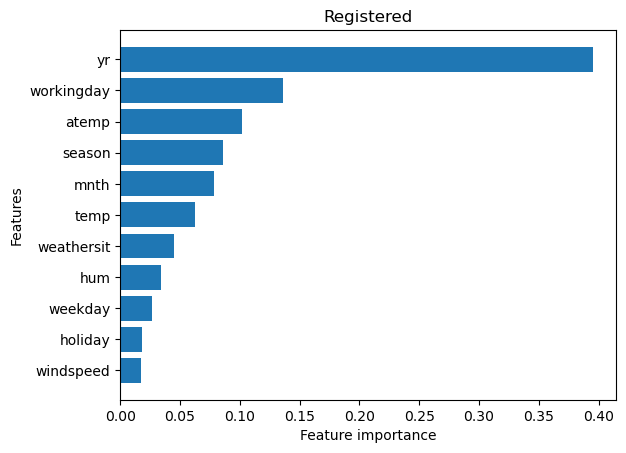

In [79]:
plot_features(X_trainr.columns,ideal_modelr.feature_importances_)
plt.title("Registered")
plt.show()

In [58]:
pred_cnt = ideal_modelc.predict(X_testc)+ideal_modelr.predict(X_testr)
pred_cnt

array([6809.327 , 1530.421 , 3276.7676, 4658.5073, 7452.6074, 7256.0137,
       1538.5183, 3128.2332, 7427.8906, 6587.307 , 1621.263 , 3379.4023,
       4920.303 , 5165.6997, 2157.129 , 2165.1875, 2308.8416, 7993.628 ,
       5256.312 , 2142.5288, 7490.6265, 6140.5215, 5384.481 , 1599.6904,
       1541.6744, 4914.9414, 1876.4427, 7286.633 , 3494.9463, 5863.4917,
       2687.9822, 4577.305 , 6518.868 , 7105.8125, 6122.761 , 5826.3335,
       7269.9   , 6439.5425, 2944.892 , 1333.4844, 4377.673 , 3397.2678,
       7072.6714, 4559.6934, 6779.714 , 1632.9955, 4373.3066, 5555.6675,
       5900.742 , 4625.519 , 3868.2192, 2484.6858, 2160.0122, 4109.7466,
       4871.1587, 4514.2363, 4199.825 , 3665.1938, 4182.9976, 6394.2256,
       5706.066 , 6686.375 , 1910.1964, 7391.422 , 6405.4375, 6382.83  ,
       5624.4937, 3951.3022, 1470.6653, 6958.6807, 3250.6755, 1799.0348,
       3413.6165, 4355.215 , 4314.7354, 3444.352 , 5217.242 , 4666.4766,
       1477.6256, 4152.836 , 2220.9236, 2141.3623, 

In [59]:
y_test.shape, pred_cnt.shape

((147,), (147,))

In [66]:
mae = mean_absolute_error(y_test, pred_cnt)
rmse = np.sqrt(mean_squared_error(y_test, pred_cnt))
r2 = r2_score(y_test, pred_cnt)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 424.7336120605469
RMSE: 662.9778701057826
R²: 0.8903858661651611


## Summary

In this project, two different modeling approaches were explored to predict the total number of bike rentals (cnt):

Direct prediction of cnt

A single model was trained on all features with cnt as the target.

**Results:**

**MAE: 198.03955078125**

**Training RMSE: 265.1614484611215**

**Training R^2: 0.9808193445205688**

This approach performed exceptionally well, capturing the overall patterns in the data effectively.

Decomposed prediction of casual and registered users separately, then summing

Two models were trained independently: one with casual as the target, and another with registered as the target.

Their predictions were added to estimate cnt.

Results:

**MAE: 424.7336120605469**

**RMSE: 662.9778701057826**

**R²: 0.8903858661651611**

This method performed worse than direct prediction, primarily because prediction errors from the two separate models accumulated when summed.

**📊 Feature Importance Insights**

**Casual users:**

Strongly influenced by workingday and weekday (leisure riders prefer weekends/holidays).

Also affected by weather variables (temp, atemp) but less so than workday/holiday effects.

Behavior is opportunistic and seasonal.

**Registered users:**

Dominated by yr (steady growth of registered riders over time).

Influenced by workingday, since commuting is a primary use case.

Weather and season matter, but registered users are more consistent and reliable in usage.

**Total cnt:**

Feature importance is closer to registered users, since they form the majority of trips.

yr is the most dominant feature, reflecting long-term adoption trends.

**✅ Conclusion**

While separating the problem into casual and registered models shows deeper understanding of rider behavior, directly predicting cnt is more accurate and efficient for this dataset.

However, the separate models are valuable for interpretation:

They highlight the stark contrast between casual riders (weekend/leisure-driven) and registered riders (commute-driven, stable, and increasing with time).

Together, these insights not only improve predictive modeling but also provide a clearer understanding of user segments, which could guide policy, marketing, or operational decisions for a bike-sharing service.